<a href="https://colab.research.google.com/github/mishenkoil/optimization-methods/blob/main/met_opt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# **Отчет по лабораторной работе №3**
[*Исходный код*](https://github.com/Rytuo/MetOpt/tree/master/lab3) <br>
***Преподаватель: Свинцов Михаил*** <br>
***Работу выполнили: Мищенко Илья, Мороз Николай, Попов Александр.***

# **Постановка задачи**
1.   Реализовать прямой метод решения СЛАУ на основе LU-разложения с
учетом следующих требований:
 *   формат матрицы – **профильный**
 *   размерность матрицы, элементы матрицы и вектор правой части читать из
файлов, результаты записывать в файл
 *   в программе резервировать объём памяти, необходимый для хранения в нем
только одной матрицы и необходимого числа векторов
 *   элементы матрицы обрабатывать в порядке, соответствующем формату
хранения

2.   Провести исследование реализованного метода на матрицах, число
обусловленности которых регулируется за счёт изменения диагонального
преобладания (то есть оценить влияние увеличения числа обусловленности на
точность решения). Для этого необходимо решить последовательность СЛАУ:


> $$A_k x_k = f_k, k \in \mathbb {N}_{\geq 0}$$
  *   Для каждого **k**, для которого система вычислительно разрешима, оценить
погрешность найденного решения.
  *   Для одного из значений **k** попытаться найти операцию, вызывающую
скачкообразное накопление погрешности, пояснить полученные результаты.


3.   Провести аналогичные исследования на матрицах Гильберта различной
размерности. Матрица Гильберта размерности **k** строится следующим образом:


> $$a_{ij} = \frac{1}{i + j - 1}, i,j = 1...k$$

4.   Реализовать метод Гаусса с выбором ведущего элемента для **плотных
матриц**. Сравнить метод Гаусса по точности получаемого решения и по количеству
действий с реализованным прямым методом LU-разложения.

5.   *(Бонус)* Реализовать метод сопряженных градиентов для
решения СЛАУ, матрица которых хранится в **разреженном строчно-столбцовом
формате** и является симметричной.
 *   Протестировать разработанную программу. Для тестирования
использовать матрицы небольшой размерности, при этом вектор правой части
формировать умножением тестовой матрицы на заданный вектор.
 *   Провести исследование реализованного метода на матрице с
диагональным преобладанием. Для каждого полученного решения с помощью невязки и погрешности оценить число обусловленности $cond(A) \geq \frac{||x-x^*||}{||x^*||} / \frac{||f-Ax||}{||f||}$
 *   Провести аналогичные исследования на матрице с обратным знаком внедиагональных элементов
 *   Повторить аналогичные исследования для плотной матрицы Гильберта для различных размерностей






# **Терминология**

## Профильный формат матриц
> **Профильные форматы** хранения матриц используется, когда матрица не
обладает определенной структурой и ненулевые элементы расположены в произвольном порядке, но при этом они сосредоточены у главной диагонали, так что
в строке можно выделить так называемый профиль – это часть строки от первого
ненулевого элемента в строке до диагонального элемента. Причем, если между
первым ненулевым элементом и элементом диагонали есть нулевые элементы, то
они будут храниться в профиле. Матрица представляется в виде четырех массивов:
*   *массив диагональных элементов* $d[...]$
*   *массив элементов верхнетреугольной части матрицы* $au$
*   *массив элементов нижнетреугольной части матрицы* $al$
*   *индексы первых элементов столбцов верхнетреугольной части матрицы* $iu$
*   *индексы первых элементов строк нижнетреугольной части матрицы* $il$

> Стоит заметить, что на лекции использовался массив ia, нужный для хранения симметричной матрицы, так как в рассматриваемой задаче такого ограничения нет - массив разделился на iu и il



## Плотный формат матриц
> **Плотный формат** - обычный формат для хранения матриц, где элементу матрицы $a_{ij} \in A$ будет соответствовать элемент двумерного массива $array[i-1][j-1]$. Обычно используется для хранения матриц небольшого размера.

## Разреженный формат
> **Разреженные форматы** хранения матриц используется, когда в матрице ненулевые элементы расположены в произвольном порядке. Эти форматы аналогичны профильным форматам. Отличие в том, что хранятся только ненулевые
элементы. *Если элементы нижнего треугольника хранятся по строкам, а элементы верхнего треугольника – по столбцам*, то такой формат **называется разреженным строчно-столбцовым**. Причем, *если портрет матрицы симметричный* (матрица может быть при этом несимметричной), то **формат называется симметричным**, *если портрет несимметричный*, то **формат – разреженный строчно-столбцовый несимметричный**. *Если хранение ненулевых элементов матрицы
осуществляется по строкам*, то **такой формат называется разреженным строчным**.
>
>Необходимые массивы для разреженного строчно-столбцового симметричного формата.
*   Одномерный целый массив $ia[n+1]$ - указатели начала строк и столбцов
*(для несимметричной матрицы)* в массивах $ja$ , $al$ и $au$
*   Одномерный целый массив $ja[k]$ ($k = ia[n+1] - 1$) номера столбцов *(строк)* внедиагональных элементов нижнего *(верхнего)* треугольника матрицы. Записывается аналогично массиву $al$ - последовательно по строкам номер столбца каждого элемента в строке нижнего треугольника *(или по столбцам номер строки каждого элемента в столбце верхнего треугольника)*
*   Одномерные вещественные массивы $al[k]$ и $au[k]$ – внедиагональные элементы нижнего *(хранение по строкам)* и верхнего *(хранение по столбцам)* треугольника матрицы.
*   Одномерный вещественный массив $diag[n]$ – диагональные элементы матрицы. 







# **Общая теория для методов**

## Обозначения
> $$\begin{equation*}
 \begin{cases}
   a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1
   \\
   a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_2
   \\
   ...
   \\
   a_{n1}x_1 + a_{n2}x_2 + ... + a_{nn}x_n = b_n
 \end{cases}
\end{equation*}$$
>
> $$Ax=b$$
$$A=(a_{ij})_{i=1...n}^{j=1...n}$$
$$b=(b_1, b_2, ... b_n)$$
$$x=(x_1, x_2, ... x_n)$$

## Метод Гаусса с выбором ведущего элемента
> *   Прямой ход метода Гаусса заключается в привидении матрицы к верхнетреугольному виду путем последовательного исключения неизвестных
*   Обратный ход метода Гаусса. После приведения матрицы к треугольному виду, становится возможным найти значения неизвестных

## *LU*-разложение
> **$LU$ разложение** – это представление матрицы $A$ в виде произведение
матриц $L \cdot U$, где $L$ – нижняя треугольная матрица, $U$ – верхняя треугольная матрица. Важно, чтобы в A главные миноры были невырождены.
*   $L_{ii} = A_{ii} - \sum_{k=1}^{i-1}L_{ik}U_{ki}$
*   $U_{ii} = 1$
*   $L_{ij} = A_{ij} - \sum_{k=1}^{j-1}L_{ik}U_{kj}$
*   $U_{ji} = \frac{1}{L_{jj}} \cdot (A_{ji} - \sum_{k=1}^{j-1} L_{jk}U_{ki})$

> Стоит отметить, что в реализации метода $LU$-разложения используется память для хранения только одной матрицы, как этого и требует задание. После разложения, исходная матрица $A$ превращается в матрицу $LU$, где элементы, расположенные ниже главной диагонали являются матрицей $L$ (на её главной диагонали расположены единицы), а элементы на главной диагонали и выше являются матрицей $U$, что позволяет позже работать с матрицей $A$ как с двумя независимыми матрицами. Это достигается благодаря тому, что как только мы находим значение элемента $L_{ij}$, значение элемента $A_{ij}$ нас больше не интересует, и на его месте мы записываем только что посчитанный элемент.

## Метод Гаусса на основе *LU* разложения
> Для решений СЛАУ прибегают к следующему использованию LU
разложения:
$$Ax=b$$
$$A=LU$$
1.   Находим $Ly=b$
>
>    $$y_i=b_i - \sum_{k=1}^{i-1} L_{ik} y_k$$
>
>2.   Находим $Ux=y$
>
>    $$x_{n-i} = \frac{1}{U_{n-i,n-i}} (y_{n-i} - \sum_{k=0}^{i-1} U_{n-i,n-k}x_{n-k})$$


## Метод сопряженных градиентов для решения СЛАУ
> Для решения СЛАУ с симметричной положительно определенной матрицей $A$, можно использовать методы многомерной оптимизации, а в частности метод сопряженных градиентов.
>
> Алгоритм:
> *   Инициализация: 
> $$x_0, r_o=b-Ax_0, z_0 = r_0$$
*   $k$-ая итерация: 
> $$\alpha_k = \frac{(r_{k-1},r_{k-1})}{(Az_{k-1}, z_{k-1})}$$
$$x_k = x_{k-1} + \alpha_k z_{k-1}$$
$$r_k = r_{k-1} - \alpha_k A z_{k-1}$$
$$\beta_k = \frac{(r_k,r_k)}{(r_{k-1},r_{k-1})}$$
$$z_k = r_k + \beta_k z_{k-1}$$
*   Критерий остановки:
>
> Оцениваем точность по относительной невязке, если $\frac{||r_k||}{||b||} < \varepsilon$ – останавливаемся













# **Результаты исследования**

## Метод Гаусса на основе LU разложения


In [ ]:
diagonal_lu = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab3/output/test_lu_diagonal.csv')
print('Матрицы с диагональным преобладанием')
diagonal_lu

Матрицы с диагональным преобладанием


,n,k,||x^* - x_n||,||x^* - x_n||/||x^*||
0,10,0,6.095911e-14,8.014771e-15
1,10,1,1.959705e-13,9.074959e-14
2,10,2,1.786576e-12,3.954545e-13
3,10,3,2.217178e-11,6.375363e-12
4,10,4,8.442649e-10,3.739400e-11
5,10,5,9.012771e-09,3.887033e-10
6,10,6,2.850419e-08,8.712619e-09
7,10,7,3.367853e-07,5.116591e-08
8,10,8,4.687135e-06,8.775771e-07
9,10,9,3.278983e-05,8.316855e-06


In [ ]:
gilbert_lu = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab3/output/test_lu_guilbert.csv')
print('Матрицы Гильберта')
gilbert_lu

Матрицы Гильберта


,n,||x^* - x_n||,||x^* - x_n||/||x^*||
0,1,5.801291e-16,1.185547e-17
1,11,9.010628e-15,5.655152e-16
2,21,2.738929e-14,8.149109e-15
3,31,5.692700e-12,2.237785e-13
4,41,2.925320e-11,4.986340e-12
5,51,8.070031e-10,9.863098e-11
6,61,6.337331e-09,4.245353e-10
7,71,5.389059e-07,3.242347e-08
8,81,2.643582e-06,9.111215e-07
9,91,8.453315e-05,1.953077e-06


## Метод Гаусса с выбором ведущего элемента

In [ ]:
diagonal_gauss = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab3/output/test_gauss_diagonal.csv')
print('Матрицы с диагональным преобладанием')
diagonal_gauss

Матрицы с диагональным преобладанием


,n,k,||x^* - x_n||,||x^* - x_n||/||x^*||
0,10,0,4.280252e-13,2.556898e-14
1,10,1,3.219893e-12,7.754418e-13
2,10,2,4.296153e-11,4.763836e-12
3,10,3,4.482082e-10,3.416928e-11
4,10,4,6.601112e-09,4.725193e-10
5,10,5,1.160466e-08,3.238238e-09
6,10,6,9.508859e-07,7.748712e-08
7,10,7,4.614918e-06,1.872934e-07
8,10,8,5.564016e-05,8.787527e-06
9,10,9,8.290711e-04,5.387265e-05


Влияние увеличения числа обусловленности на точность (за счет увеличения диагонального преобладания), сравнение двух методов:


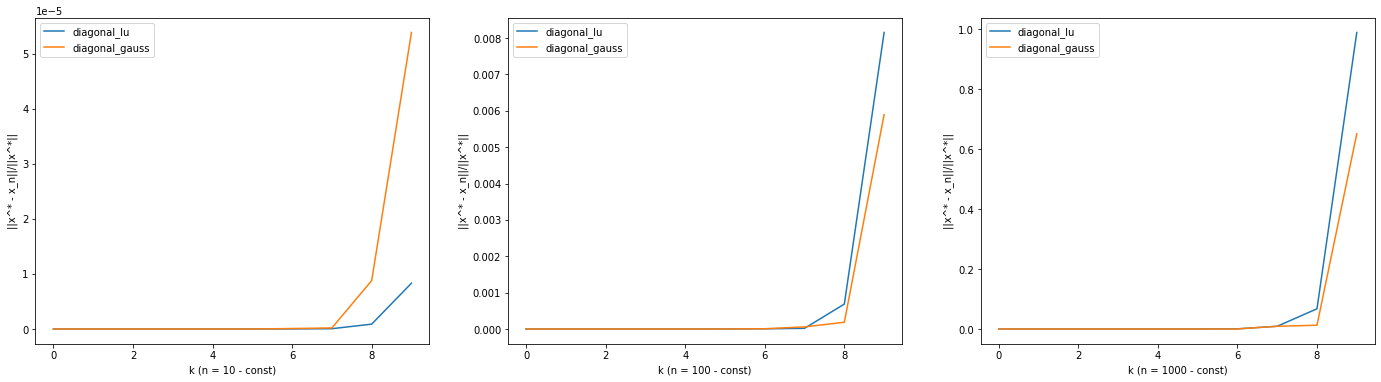

In [ ]:
def build_report_1():
  fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

  ax1.plot(diagonal_lu['k'][0:10], diagonal_lu['||x^* - x_n||/||x^*||'][0:10], label='diagonal_lu')
  ax1.plot(diagonal_gauss['k'][0:10], diagonal_gauss['||x^* - x_n||/||x^*||'][0:10], label='diagonal_gauss')
  ax1.set_xlabel('k (n = 10 - const)')
  ax1.set_ylabel('||x^* - x_n||/||x^*||')
  ax1.legend()

  ax2.plot(diagonal_lu['k'][10:20], diagonal_lu['||x^* - x_n||/||x^*||'][10:20], label='diagonal_lu')
  ax2.plot(diagonal_gauss['k'][10:20], diagonal_gauss['||x^* - x_n||/||x^*||'][10:20], label='diagonal_gauss')
  ax2.set_xlabel('k (n = 100 - const)')
  ax2.set_ylabel('||x^* - x_n||/||x^*||')
  ax2.legend()

  ax3.plot(diagonal_lu['k'][20:30], diagonal_lu['||x^* - x_n||/||x^*||'][20:30], label='diagonal_lu')
  ax3.plot(diagonal_gauss['k'][20:30], diagonal_gauss['||x^* - x_n||/||x^*||'][20:30], label='diagonal_gauss')
  ax3.set_xlabel('k (n = 1000 - const)')
  ax3.set_ylabel('||x^* - x_n||/||x^*||')
  ax3.legend()

  plt.show()

print('Влияние увеличения числа обусловленности на точность (за счет увеличения диагонального преобладания), сравнение двух методов:')
build_report_1()  

Влияние на точность увеличения размерности в матрицах Гильберта:


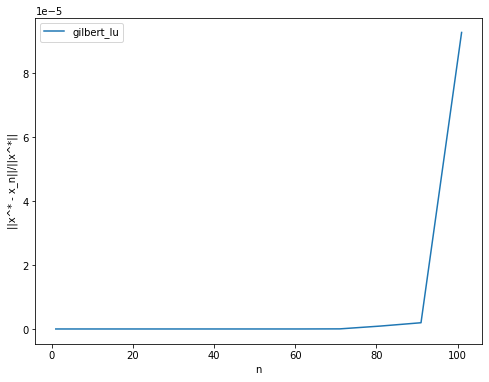

In [ ]:
def build_report_2():
  fig, ax1 = plt.subplots(figsize=(8, 6))

  ax1.plot(gilbert_lu['n'], gilbert_lu['||x^* - x_n||/||x^*||'], label='gilbert_lu')
  ax1.set_xlabel('n')
  ax1.set_ylabel('||x^* - x_n||/||x^*||')
  ax1.legend()

  plt.show()

print('Влияние на точность увеличения размерности в матрицах Гильберта:')
build_report_2()  

# **Метод сопряженных градиентов**

## Отрицательно определенные элементы


In [ ]:
conjugate_diagonal = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab3/output/test_conjugate_diagonal.csv')
conjugate_diagonal

,n,iterations,||x* - x_k||,||x* - x_k|| / ||x*||,cond
0,10,10,3.996732e-14,6.028912e-15,1.458537
1,10,10,5.436912e-13,6.170215e-14,1.671402
2,10,10,5.972452e-12,8.382037e-13,1.783303
3,10,10,6.108703e-11,5.826612e-12,0.540427
4,10,10,4.222995e-10,5.015060e-11,1.851625
5,10,10,8.110517e-09,9.087149e-10,1.595858
6,10,10,9.293661e-08,6.817530e-09,1.428911
7,10,10,8.728862e-07,8.888236e-08,0.715959
8,10,10,4.088208e-06,2.403751e-07,1.880702
9,10,10,6.809532e-05,4.667928e-06,0.682638


## Положительно определенные элементы


In [ ]:
conjugate_reverse_diagonal = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab3/output/test_conjugate_reverse_diagonal.csv')
conjugate_reverse_diagonal

,n,iterations,||x* - x_k||,||x* - x_k|| / ||x*||,cond
0,10,10,3.134454e-14,2.185871e-15,0.530286
1,10,10,1.370228e-13,5.387729e-14,0.677354
2,10,10,3.027937e-12,7.643025e-13,0.677709
3,10,10,6.022182e-11,4.114670e-12,1.519832
4,10,10,8.968789e-10,7.947498e-11,0.583300
5,10,10,9.378938e-09,8.941085e-10,0.733213
6,10,10,8.855535e-08,1.652619e-09,0.599888
7,10,10,2.635229e-07,4.792527e-08,1.570347
8,10,10,6.694928e-06,9.883148e-07,1.952464
9,10,10,7.534120e-05,3.676629e-06,0.552706


## Гильбертовы матрицы

In [ ]:
conjugate_guilbert = pd.read_csv('https://raw.githubusercontent.com/Rytuo/MetOpt/master/lab3/output/test_conjugate_guilbert.csv')
conjugate_guilbert

,n,iterations,||x* - x_k||,||x* - x_k|| / ||x*||,cond
0,10,10,6.445900e-13,1.812015e-14,1.506754
1,10,10,2.678631e-12,5.226217e-13,2.368108
2,10,10,3.285798e-11,1.411089e-12,1.977273
3,10,10,4.996439e-10,1.599930e-11,2.141322
4,10,10,3.261282e-09,9.203194e-10,1.861535
5,10,10,1.841279e-08,3.880510e-09,1.533607
6,10,10,6.738984e-07,6.315536e-08,0.461521
7,10,10,2.876598e-06,4.452398e-07,0.759547
8,10,10,7.843685e-05,8.616561e-06,0.676415
9,10,10,4.914903e-04,8.324242e-05,2.248692


**Видно, что при больших n количество итераций на порядки меньше самого n.**

# **Вывод**
*   По итогам исследования, можно сделать вывод, что $LU$ Гаусс предпочтительнее для одинаковых матриц, поскольку сохранив LU факторизацию, последующие вычисления можно производить за $O(n^2)$.

*   Если матрицы различны, то нет разницы какой метод использовать.

*   Число обусловленности на Гилбертовых матрицах растет экспоненциально, когда для матриц с диагональным преобладанием растет полиномиально.

* Метод сопряженных градиентов хорошо показывает себя на обусловленных матрицах и совершает сильно меньше итераций, чем n.